In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.size

10692

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here in the info we can see data is missing for the Age,Cabin,Embarked.

We can also check no.of null values in this way too.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age,Cabin,Embarked columns have null values.

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Data Visualization-->matplotlib

Histogram Representation-->Age column

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

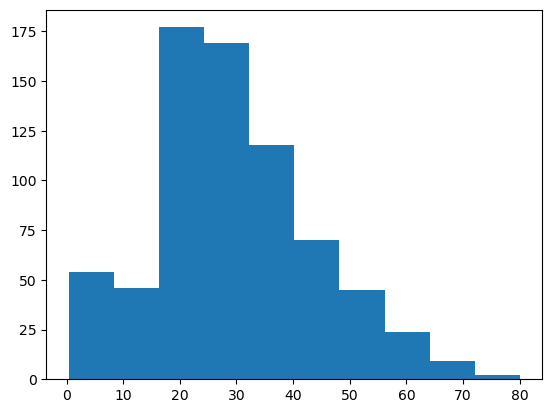

In [14]:
plt.hist(df['Age'])  

Here in the above output the data produced is:
1st array says the count 
2nd array says the age bar mean 
and the line <BarContainer object of 10 artists> says that there are 10 bars in the graphs

Inorder to remove the data/text.we should use plt.show() to display the graph as output.Let's check that;

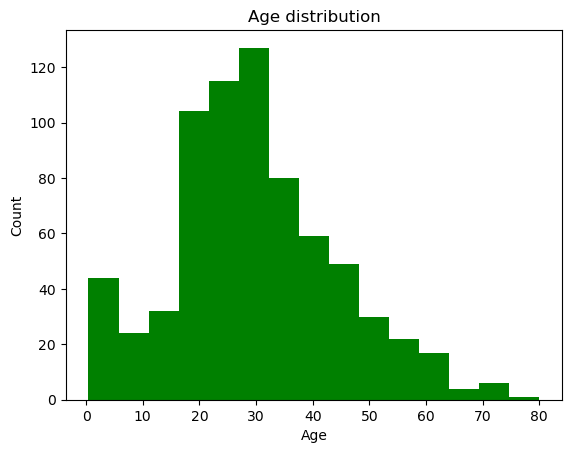

In [15]:
plt.hist(df['Age'],bins=15,color="Green")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Here bins=value says no.of bars to be displayed.

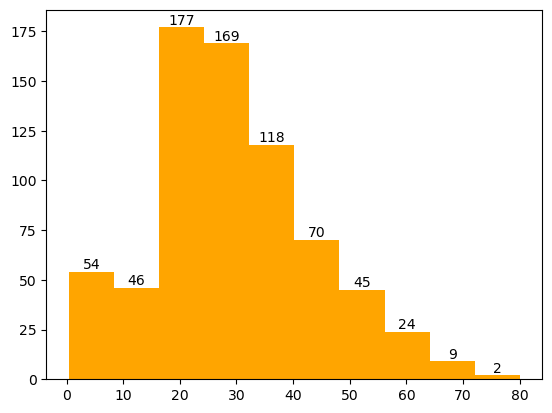

In [16]:
counts,edges,bars=plt.hist(df['Age'],color='orange')
plt.bar_label(bars)
plt.show()

Here,by bar_label() we can display the count on each bar.

In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
df['Age'].isnull().sum()

177

In [19]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [20]:
df['Age'].isnull().sum()

177

Here the null values are not changed.So,inorder to convert the null values permanently we use inplace=True.

In [21]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [22]:
df['Age'].isnull().sum()

0

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survival distribution

for this data visualistaion we can either use bar graph or pie chart.

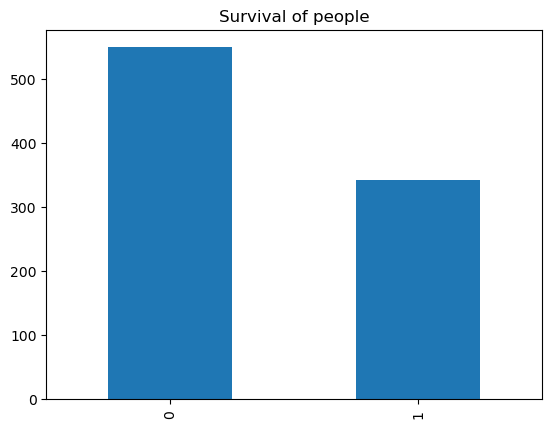

In [24]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival of people')
plt.show()

Displaying the count for the above bar graph on the bars.

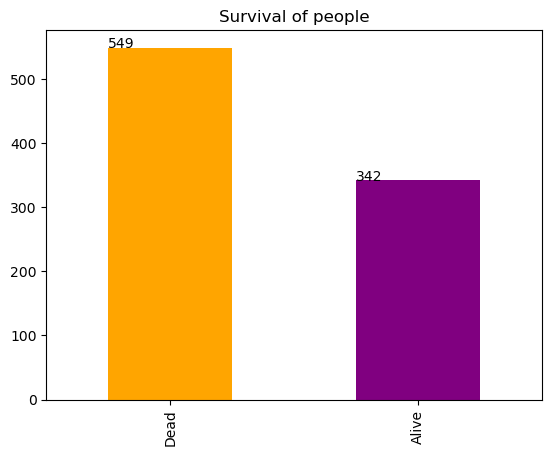

In [25]:
c=['orange','purple']
ax=df['Survived'].value_counts().plot(kind='bar',color=c)
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()))
    
plt.xticks([0,1],['Dead','Alive'])
plt.title('Survival of people')
plt.show()

In [26]:
a=df['Survived'].value_counts().index.tolist()
b=df['Survived'].value_counts().values.tolist()
print(a,b)

[0, 1] [549, 342]


Here plt.legend() display the labels denotation.

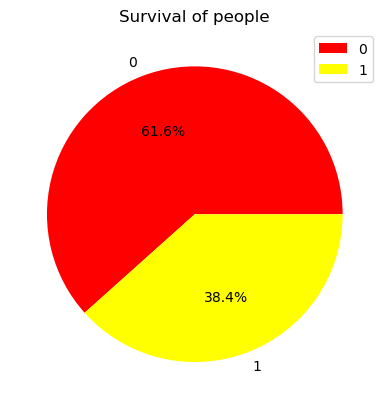

In [27]:
plt.pie(b,labels=a,colors=['red','yellow'],autopct='%.1f%%')
plt.title('Survival of people')
plt.legend()
plt.show()

Pclass distribution

In [28]:
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

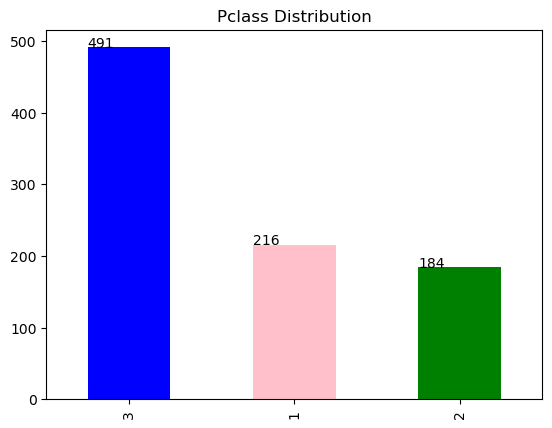

In [29]:
c = ['blue','pink','green']
ax=df['Pclass'].value_counts().plot(kind='bar',color=c)
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()))
plt.title('Pclass Distribution')
plt.show()

In [30]:
df['Pclass'].value_counts()
a=df['Pclass'].value_counts().index.tolist()
b=df['Pclass'].value_counts().values.tolist()
print(a,b)

[3, 1, 2] [491, 216, 184]


Droping Cabin column without effecting the other columns

In [31]:
df.drop(['Cabin'], axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Displaying 2 people who didnot give place of Travel

In [32]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Filling Embarked column properly.

In [33]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df['Embarked'].isnull().sum()

2

In [35]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [36]:
df['Embarked'].fillna('S',inplace=True)

In [37]:
df['Embarked'].isnull().sum()

0

Feature Encoding-->converting column/s into interms of 0's and 1's

In [38]:
print(df['Pclass'])
pclass=pd.get_dummies(df['Pclass'])
print(pclass)

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
     1  2  3
0    0  0  1
1    1  0  0
2    0  0  1
3    1  0  0
4    0  0  1
..  .. .. ..
886  0  1  0
887  1  0  0
888  0  0  1
889  1  0  0
890  0  0  1

[891 rows x 3 columns]


Similarly for the Sex and Embarked.

In [39]:
age=pd.get_dummies(df['Sex'])
age

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [40]:
embarked=pd.get_dummies(df['Embarked'])
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


We can use drop_first=True inorder to remove a column in dummies dataset.For Example;

In [41]:
pclass_fc=pd.get_dummies(df['Pclass'],drop_first=True)
pclass_fc

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


Here we can understand the data as if there is no chance of 2 and 3 then we can consider the chance as 1

Age vs Fare

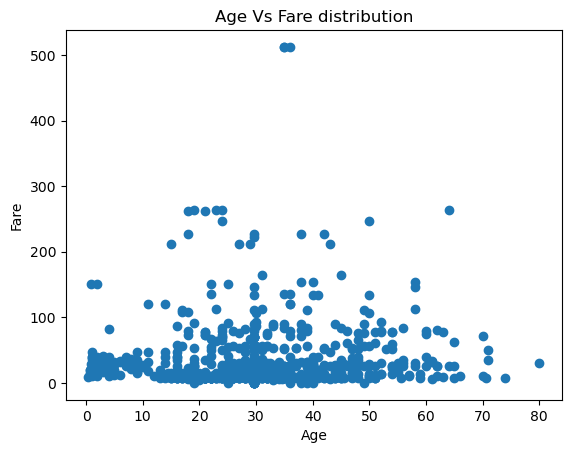

In [42]:
plt.scatter(df['Age'],df['Fare'])
plt.title("Age Vs Fare distribution")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [43]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot #interactive plots
#to make jupyter notebook offline mode
py.offline.init_notebook_mode(connected = True)
cf.go_offline()
#to display the list of environments plotly supports
import plotly.io as pio

In [44]:
import plotly.graph_objects as go

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Histogram using Plotly

In [46]:
#Histogram using Plotly
trace = go.Histogram(x = df['Age'],nbinsx=15,marker={'color':'red'})
layout = go.Layout(title="Age Distribution")
#then will display the figure
figure = go.Figure(data=trace,layout=layout)
figure.show()

In [47]:
d=df['Survived'].value_counts().index.tolist()
e=df['Survived'].value_counts().values.tolist()

Piechart using Plotly

In [48]:
trace=go.Pie(labels=['Dead','Alive'],values=e,marker={'colors':['red','green']},hoverinfo='value')
layout=go.Layout(title='Survival of People')
figure = go.Figure(data=trace,layout=layout)
figure.show()

Scatter plot for relationship age Vs fare

In [49]:
trace=go.Scatter(x=df['Age'],y=df['Fare'],mode='markers')
layout=go.Layout(title='Age Vs Fare',xaxis={'title':'Age'},yaxis={'title':'Fare'})
figure = go.Figure(data=trace,layout=layout)
figure.show()